SENTIMENT ANALYSIS ON MOVIE REVIEWS

● Algorithm: Naive Bayes Classifier, Random Forest Classifier, K-Nearest Neighbors
(KNN), xgboosting classifier,logistic Regression, Decision Tree Classifier,
● Description: Perform sentiment analysis on movie reviews to determine if the
sentiment is positive or negative.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Cognorise ML/IMDB Dataset.csv')
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Preprocessing: Remove HTML tags and unnecessary characters
df['review'] = df['review'].str.replace('<br />', ' ').str.replace('[^a-zA-Z ]', '')

# Convert sentiment to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Splitting the data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


In [ ]:
# Vectorizing the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
print(X_train_vect.shape)
print(X_test_vect.shape)

(40000, 5000)
(10000, 5000)


In [ ]:

# Training the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)


MultinomialNB()

In [ ]:
print(X_train_vect)

  (0, 2069)	0.11265416590481121
  (0, 4630)	0.06488963271566954
  (0, 2)	0.05234560154669363
  (0, 483)	0.11245123055277133
  (0, 3856)	0.07455894736939701
  (0, 4714)	0.09652053468117583
  (0, 3501)	0.10500892664331621
  (0, 2880)	0.10361706850684646
  (0, 119)	0.07339095150837484
  (0, 3468)	0.10199243176379734
  (0, 1666)	0.09867254841676518
  (0, 3059)	0.11275652539841863
  (0, 4201)	0.09040135585238307
  (0, 1400)	0.11704016653512325
  (0, 4906)	0.09743490893094375
  (0, 2306)	0.11100007006664143
  (0, 1184)	0.06645873131381946
  (0, 2082)	0.09351496975621211
  (0, 3337)	0.045506112858830695
  (0, 123)	0.052111984088371914
  (0, 2393)	0.09656107417357593
  (0, 643)	0.11338361957757867
  (0, 2206)	0.08296755523034913
  (0, 3790)	0.11072377547864622
  (0, 1939)	0.06567383135068053
  :	:
  (39999, 1353)	0.07273195016408059
  (39999, 2169)	0.10238361392939507
  (39999, 3583)	0.07780944412384463
  (39999, 2757)	0.07921430860023257
  (39999, 4004)	0.10018834410524087
  (39999, 3918)	0.0

In [ ]:
print(nb_classifier)

MultinomialNB()


In [ ]:
# Predicting the test set results
y_pred = nb_classifier.predict(X_test_vect)

In [ ]:
print(y_pred)

[0 1 0 ... 1 0 0]


In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8507
Confusion Matrix:
[[4206  755]
 [ 738 4301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



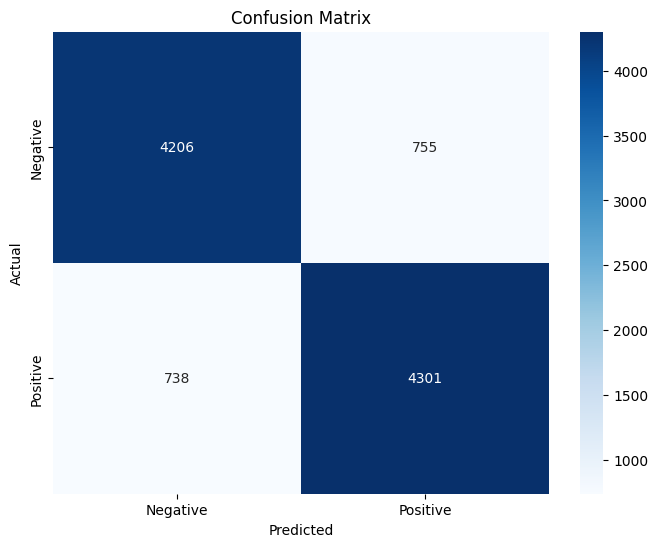

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Vectorizing the text data and Training the Naive Bayes Classifier using Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],
    'nb__alpha': [0.1, 1, 10]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000,
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 1, 10],
                         'tfidf__max_features': [1000, 5000, 10000]},
             scoring='accuracy')

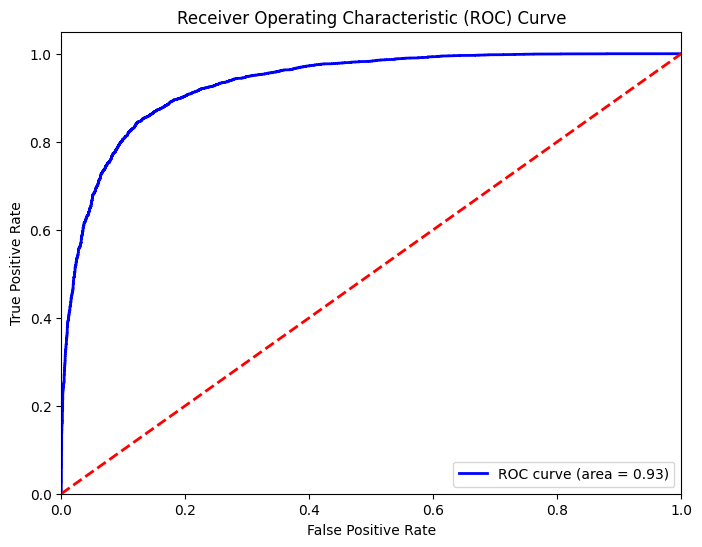

In [ ]:
# Predicting the test set results using the best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

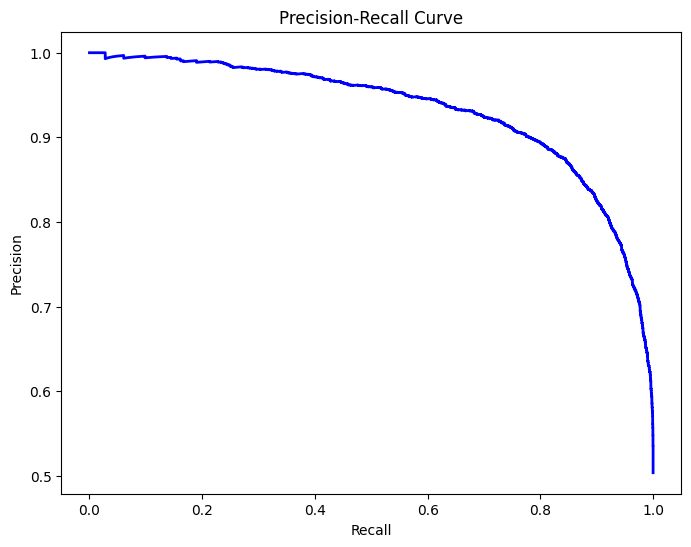

In [ ]:
# Plotting the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Train XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_vect, y_train)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vect, y_train)




In [ ]:
# Update the predict_sentiment function to support multiple classifiers
def predict_sentiment(review, classifier='nb'):
    review = re.sub('<br />', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review_vect = vectorizer.transform([review])

    if classifier == 'nb':
        prediction = nb_classifier.predict(review_vect)
    elif classifier == 'xgb':
        prediction = xgb_classifier.predict(review_vect)
    elif classifier == 'dt':
        prediction = dt_classifier.predict(review_vect)
    else:
        raise ValueError("Unsupported classifier. Choose 'nb', 'xgb', or 'dt'.")

    return 'positive' if prediction[0] == 1 else 'negative'

In [ ]:



# Example of predicting sentiment for a new review using different classifiers
new_review = "Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like \"dressed-up midgets\" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be \"up\" for this movie."

print("Review:", new_review)
print("Sentiment (Naive Bayes):", predict_sentiment(new_review, classifier='nb'))
print("Sentiment (XGBoost):", predict_sentiment(new_review, classifier='xgb'))
print("Sentiment (Decision Tree):", predict_sentiment(new_review, classifier='dt')

In [ ]:
# Function to predict sentiment of a new review
def predict_sentiment(review):
    review = re.sub('<br />', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review_vect = vectorizer.transform([review])
    prediction = nb_classifier.predict(review_vect)
    return 'positive' if prediction[0] == 1 else 'negative'


In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
nb_classifier = MultinomialNB()

Review: Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.


NotFittedError: The TF-IDF vectorizer is not fitted